In [2]:
import networkx as nx
import retworkx as rx
import matplotlib.pyplot as plt
import random as rd
from conjugate_gradient import conjugate_gradient_opt,conjugate_gradient_back
import sys
sys.path.append('\graph_immunization')
from network_generation import *
from vulnerability_meas import max_ev
import numpy as np
from tqdm import tqdm
import EoN


In [3]:
def simu(G,ni=10):
    R_last=0
    for j in range(50):
        infected = rd.sample(G.nodes,ni)
        t, S, I, R = EoN.fast_SIR(G, 0.6, 1,
                            initial_infecteds = infected)
        R_last+=R[-1]

    return R_last/(S[0]+len(infected))/50

In [4]:
N = 1000
G  = small_world(N)
#G = config_model(1000)

In [3]:
vaccinated = conjugate_gradient_opt(G,N,exact=False)

 64%|██████▍   | 645/1000 [00:23<00:18, 18.90it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: divide by zero encountered in true_divide
  return b_k,np.where(b_k!=0.,1/b_k/1000,0)
 84%|████████▎ | 837/1000 [00:35<00:13, 12.43it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: overflow encountered in true_divide
  return b_k,np.where(b_k!=0.,1/b_k/1000,0)
100%|██████████| 1000/1000 [07:51<00:00,  2.12it/s]


In [1]:
### conjugate_grad

conj_grad = [0]
cost = [0]

for i in tqdm(range(0,N)):
    node = vaccinated[:i]
    G_i = G.copy()
    G_i.remove_nodes_from(node)
    if i<N-10:
        r = simu(G_i)
    else:
        r = simu(G_i,1)
    conj_grad.append(r)
    cost.append((i+1)/N)


NameError: name 'tqdm' is not defined

In [3]:
vacc_back = conjugate_gradient_back(G,N)

### conjugate_grad back

conj_grad_back = [0]

for i in tqdm(range(0,N)):
    node = vacc_back[i]
    G_i = G.copy()
    G_i.remove_nodes_from(node)
    r = simu(G_i)
    conj_grad_back.append(r)

  0%|          | 0/1000 [00:00<?, ?it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: divide by zero encountered in reciprocal
  return b_k,np.reciprocal(b_k)/1000
100%|██████████| 1000/1000 [00:12<00:00, 80.82it/s]

6043.095811436312


In [ ]:
## vacc random
vaccinated_rd = list(range(N))
rd.shuffle(vaccinated_rd)
rand = [0]

for i in tqdm(range(0,N)):
    node = vaccinated_rd[i]
    G_i = G.copy()
    G_i.remove_nodes_from(node)
    r = simu(G_i)
    rand.append(r)

780.3917703653581


In [ ]:
from Vaccination_select import centrality_max_recomp,deg_max

vacc_centr_r=centrality_max_recomp(G,N)
vacc_deg_r=deg_max(G,N)

eigendrop_cent_r = [0]

for i in tqdm(range(0,N)):
    node = vacc_centr_r[i]
    G_i = G.copy()
    G_i.remove_nodes_from(node)
    r = simu(G_i)
    eigendrop_cent_r.append(r)

score=0
eigendrop_deg_r = [0]
for i in tqdm(range(0,N)):
    node = vacc_deg_r[i]
    G_i = G.copy()
    G_i.remove_nodes_from(node)
    r = simu(G_i)
    eigendrop_deg_r.append(r)




100%|██████████| 100/100 [00:00<00:00, 2019.72it/s]


747.8639953619645
724.2422957084069


In [ ]:
## ant colony
vacc_ant = np.load('ant_colony.npy').astype(int)


eigendrop_ant = [0]
for i in tqdm(range(0,N)):
    node = vacc_ant[i]
    G_i = G.copy()
    G_i.remove_nodes_from(node)
    r = simu(G_i)
    eigendrop_ant.append(r)

764.8293383380828


In [ ]:

np.save("ed_conj_grad_smallworld.npy",np.array([cost,eigendrop,eigendrop_rd]))

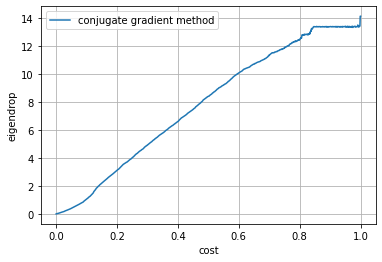

In [5]:
plt.figure(1)
plt.plot(cost,conj_grad,label="conjugate gradient method")
#plt.plot(cost,eig_back,label="conjugate gradient back")
#plt.plot(cost,grad,label="grad of the method")
#plt.plot(cost,eigendrop_rd,label="random vaccination")
#plt.plot(cost,eigendrop_deg,label="degree centrality no recomp")
#plt.plot(cost,eigendrop_cent,label="betweenness centrality no recomp")
#plt.plot(cost,eigendrop_deg_r,label="degree centrality ")
#plt.plot(cost,eigendrop_cent_r,label="betweenness centrality ")
#plt.plot(cost,eigendrop_ant,label='ant colony')
plt.grid()
plt.xlabel('cost')
plt.ylabel("eigendrop")
plt.legend()
plt.show()

In [ ]:
k=1
for i in range(1,1001):
    k*=i
s =str(k)
print(len(s))

2568
